Dataset: Video Game Sales and Ratings

Goals:


*   Upload dataset
*   Import libraries
*   data exploration
*   data cleaning
*   data analysis
*   visualisation
*   machine learning applications


# Import libraries

In [2]:
import pandas as pd #manipulate dataframe
import numpy as np #manipulate arrays
import matplotlib.pyplot as plt #plot basic visuals
import seaborn as sns #plotting library
import plotly.express as px #plots of higher quality
from sklearn.preprocessing import LabelEncoder  #encode features to make them numerical for ML

# Part1: explore the dataset

In [138]:
df = pd.read_csv('Video_Games.csv')
df.head()

,index,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#Get the shape of the dataframe (rows,cols)
df.shape

(16928, 17)

In [6]:
#Get information about the dataframe: missing values, type of col
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16928 entries, 0 to 16927
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   index            16928 non-null  int64  
 1   Name             16926 non-null  object 
 2   Platform         16928 non-null  object 
 3   Year_of_Release  16655 non-null  float64
 4   Genre            16926 non-null  object 
 5   Publisher        16873 non-null  object 
 6   NA_Sales         16928 non-null  float64
 7   EU_Sales         16928 non-null  float64
 8   JP_Sales         16928 non-null  float64
 9   Other_Sales      16928 non-null  float64
 10  Global_Sales     16928 non-null  float64
 11  Critic_Score     8260 non-null   float64
 12  Critic_Count     8260 non-null   float64
 13  User_Score       10159 non-null  object 
 14  User_Count       7718 non-null   float64
 15  Developer        10240 non-null  object 
 16  Rating           10092 non-null  object 
dtypes: float64(9

In [10]:
df.isnull().sum()

,0
index,0
Name,2
Platform,0
Year_of_Release,273
Genre,2
Publisher,55
NA_Sales,0
EU_Sales,0
JP_Sales,0
Other_Sales,0


How many games have both critic and user scores available?

In [16]:
#Display the count of game with both critic and user scores available
games_with_scores = df[['Critic_Score','User_Score']].dropna()
games_with_scores_count = games_with_scores.shape[0]
games_with_scores_count

8222

In [19]:
#Descriptive statistics of the dataset (only numerical values)
df.describe()

,index,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
count,16928.000000,16655.00000,16928.000000,16928.000000,16928.000000,16928.000000,16928.000000,8260.000000,8260.000000,7718.000000
mean,8463.500000,2006.48532,0.266390,0.146850,0.078170,0.047861,0.539520,69.037893,26.428692,163.269629
std,4886.837014,5.88289,0.814326,0.504585,0.308756,0.186675,1.550545,13.943198,18.989929,562.786746
min,0.000000,1980.00000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,4.000000
25%,4231.750000,2003.00000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,10.000000
50%,8463.500000,2007.00000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,22.000000,25.000000
75%,12695.250000,2010.00000,0.240000,0.110000,0.040000,0.040000,0.490000,79.000000,36.000000,82.000000
max,16927.000000,2020.00000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,10665.000000


In [35]:
pd.set_option("display.max_rows",None)



*   What publishers have the higher global sales?
*   What platforms have the higher global sales?
*   What Genre have the higher global sales?
*   What features correlates with high user score?



What publishers have the higher global sales?

In [21]:
df.columns

Index(['index', 'Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher',
       'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales',
       'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count', 'Developer',
       'Rating'],
      dtype='object')

In [24]:
#Checking for missing values
missing_values = df[['Publisher','Global_Sales']].isnull().sum()
print("Missing values:\n",missing_values)

Missing values:
 Publisher       55
Global_Sales     0
dtype: int64


Top Publishers by Global Sales:
 Publisher
Namco Bandai Games               260.85
Sega                             275.89
Konami Digital Entertainment     284.90
THQ                              342.74
Take-Two Interactive             406.92
Ubisoft                          493.05
Sony Computer Entertainment      634.45
Activision                       742.39
Electronic Arts                 1155.88
Nintendo                        1830.35
Name: Global_Sales, dtype: float64


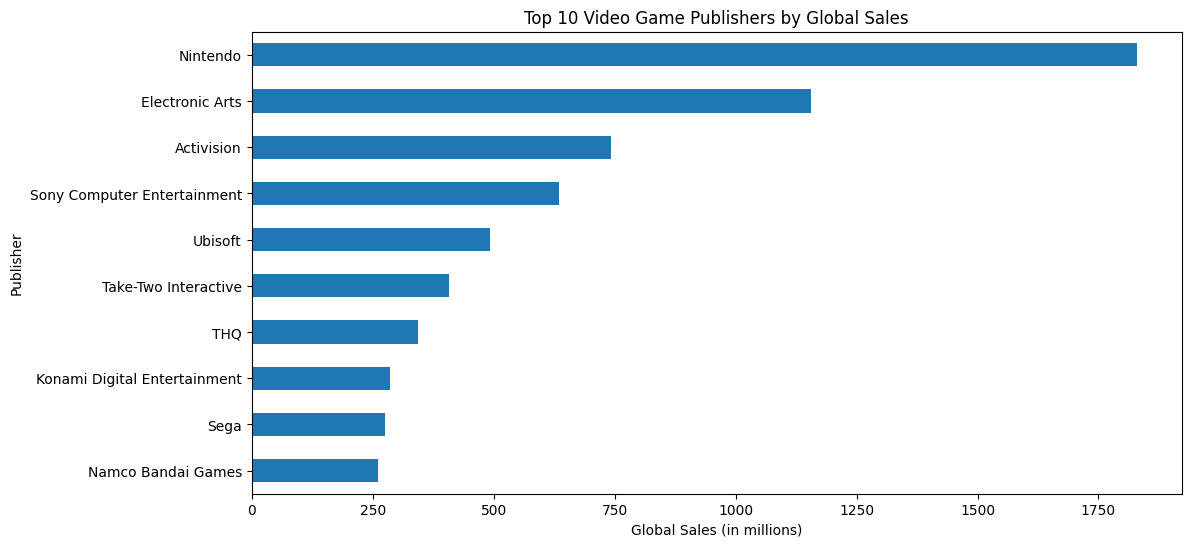

In [47]:
#Exclude rows with missing publisher information
video_game_cleaned_df = df.dropna(subset=['Publisher'])
video_game_cleaned_df

#Aggregate global sales by publisher
publisher_sales = video_game_cleaned_df.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False)
publisher_sales

#Display the top 10 publisher by global Sales
top_publisher = publisher_sales.head(10).sort_values(ascending=True)
print("Top Publishers by Global Sales:\n",top_publisher)

#Visualisation
plt.figure(figsize=(12,6))
top_publisher.plot(kind='barh')
plt.title('Top 10 Video Game Publishers by Global Sales')
plt.xlabel('Global Sales (in millions)')
#plt.xticks(rotation=20)
plt.show()

What platforms have the higher global sales?

In [48]:
# Check missing values
df[['Platform','Global_Sales']].isnull().sum()

,0
Platform,0
Global_Sales,0


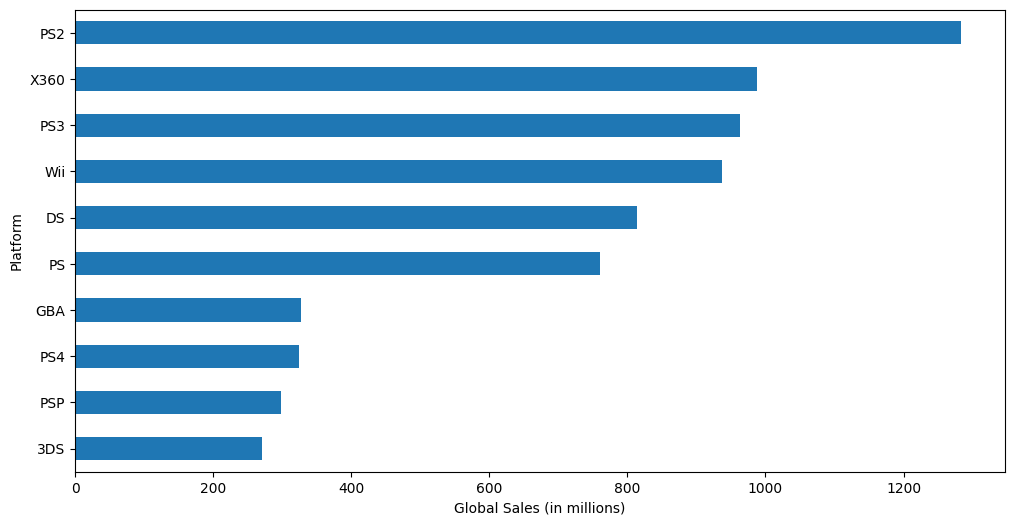

In [71]:
#Display the top 10 platform by global sales
platform_sales =df.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False)
#print(platform_sales)

top_platform = platform_sales.head(10).sort_values(ascending=True)
#print(top_platform)


#Visualisation
plt.figure(figsize=(12,6))
top_platform.plot(kind='barh')
plt.title('Top 10 Video Game Platforms by Global Sales')
plt.xlabel('Global Sales (in millions)')
plt.show()

What Genre have the higher global sales?

In [60]:
# Check missing values
df[['Genre','Global_Sales']].isnull().sum()

,0
Genre,2
Global_Sales,0


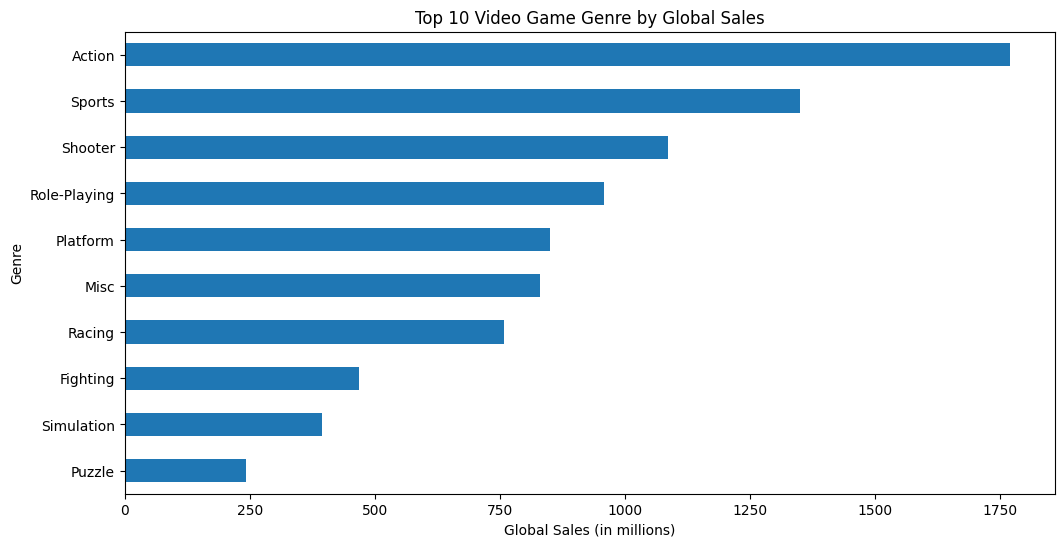

In [85]:
#Exclude rows with missing publisher information
genre_cleaned_df = df.dropna(subset='Genre')
genre_cleaned_df.shape

genre_sales = genre_cleaned_df.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False)
top_genre = genre_sales.head(10).sort_values(ascending=True)

#Visualisation
plt.figure(figsize=(12,6))
top_genre.plot(kind='barh')
plt.title('Top 10 Video Game Genre by Global Sales')
plt.xlabel('Global Sales (in millions)')
plt.show()





In [87]:
#Visualisation with using plotly
fig = px.bar(top_genre,
             x=top_genre.values,
             y=top_genre.index,
             title='Top Genres by Global Sales',
             labels={'x':'Global Sales (in millions)','y':'Genre'})
fig.show()

What features correlates with high user score?

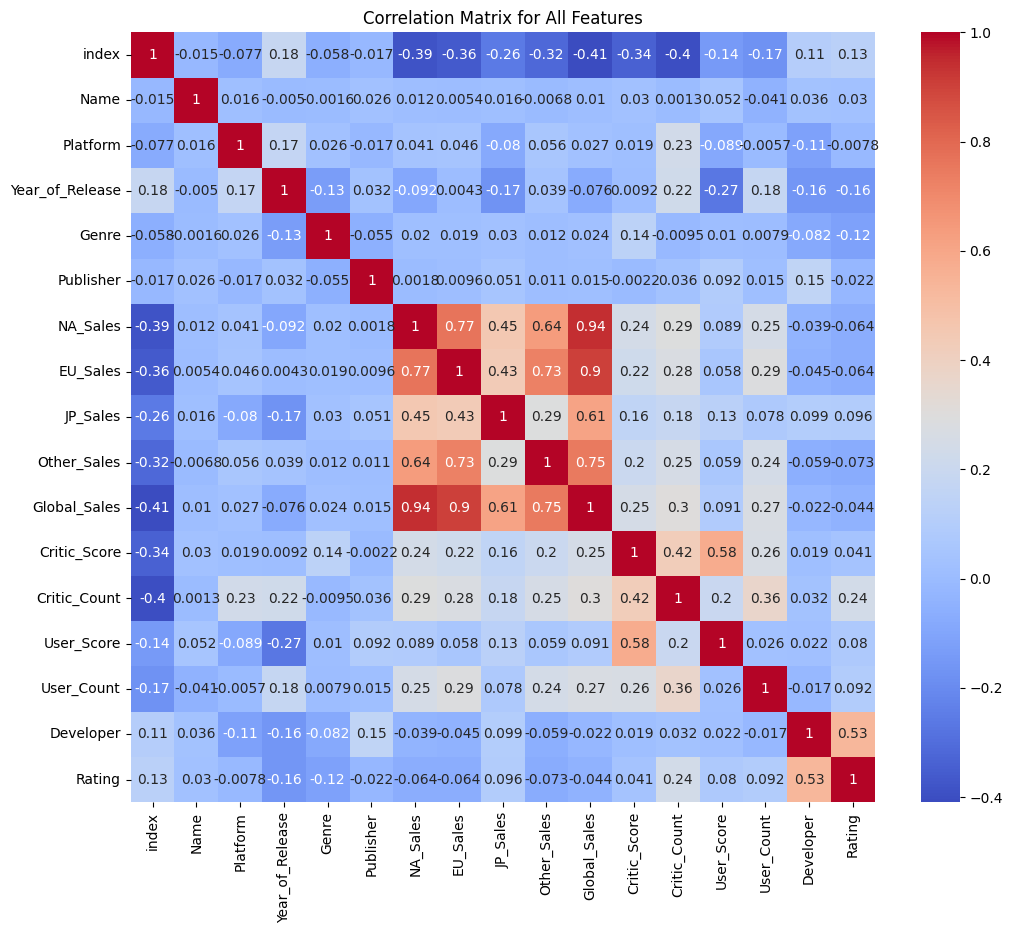

In [113]:
# convert user score to numeric, treating 'tbd' as NaN
df['User_Score'] = pd.to_numeric(df['User_Score'],errors='coerce')

# Initialise labelEncoder
le = LabelEncoder()

# Loop through each col in the DataFrame
for col in df.columns:
  if df[col].dtype == 'object':
    # convert obj type to category type
    df[col] = df[col].astype('category')
    # apply label encoding on categorical columns
    df[col] = le.fit_transform(df[col].cat.codes.replace(-1,np.nan))


#Calculate the correlation matrix
corr_matrix = df.corr()

# visualise corr matrix using a heatmap
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for All Features')
plt.show()

In [114]:
df.columns

Index(['index', 'Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher',
       'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales',
       'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count', 'Developer',
       'Rating'],
      dtype='object')

In [115]:
#Select only the specified columns
selected_col = ['Name', 'Platform','Genre', 'Publisher','Global_Sales',
       'Critic_Score','User_Score','Developer','Rating']

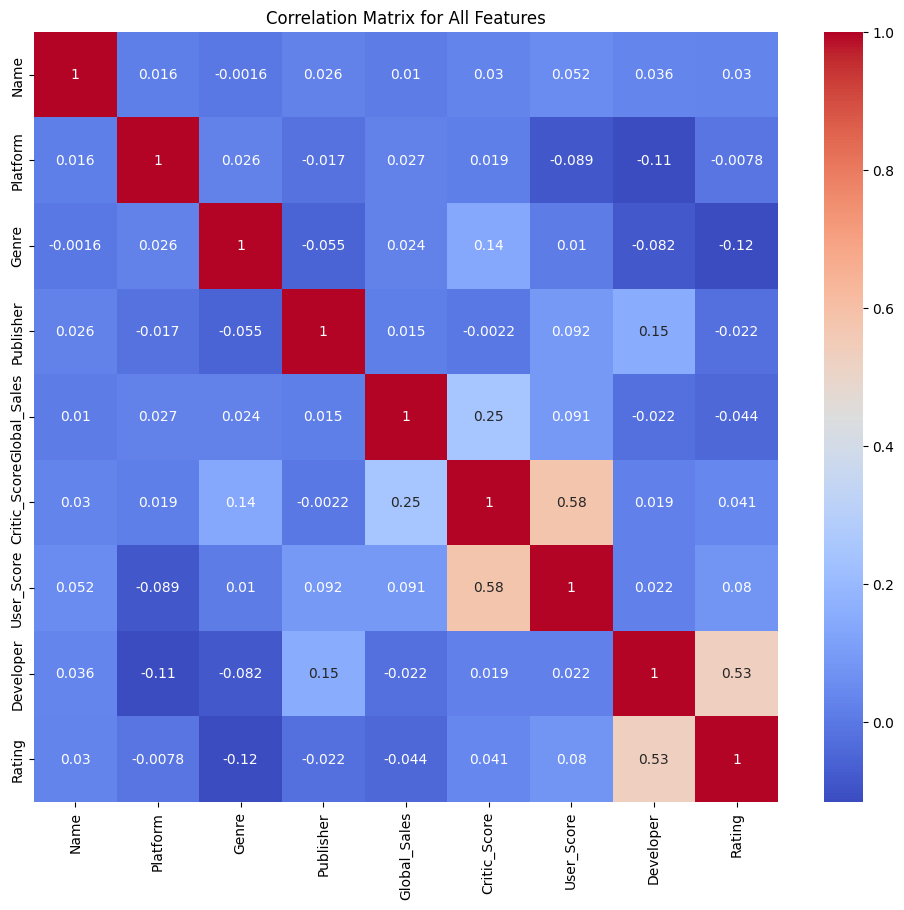

In [118]:
#Calculate the correlation matrix
corr_matrix = df[selected_col].corr()

# visualise corr matrix using a heatmap
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for All Features')
plt.show()

We found that user score only correlates critic_score with 0.58. while there is no much correlation with other features.

# Part 2:

1. Trend over time: Examine how video game sales have changed over the years. Identify periods of significant growth or decline.

2. Reginal Preferences: Compare the popularity of genres or platforms across different regions.

3. Correlation between Critic and User Scores: Explore how closely user opinions align with professional critics.

Trend over time: Examine how video game sales have changed over the years. Identify periods of significant growth or decline.

In [121]:
df.columns

Index(['index', 'Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher',
       'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales',
       'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count', 'Developer',
       'Rating'],
      dtype='object')

In [126]:
#check missing value
df['Year_of_Release'].isnull().sum()

np.int64(273)

In [128]:
video_game_filter = df.dropna(subset='Year_of_Release')

video_game_filter['Year_of_Release'] = video_game_filter['Year_of_Release'].astype(int)

/tmp/ipython-input-2992705099.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



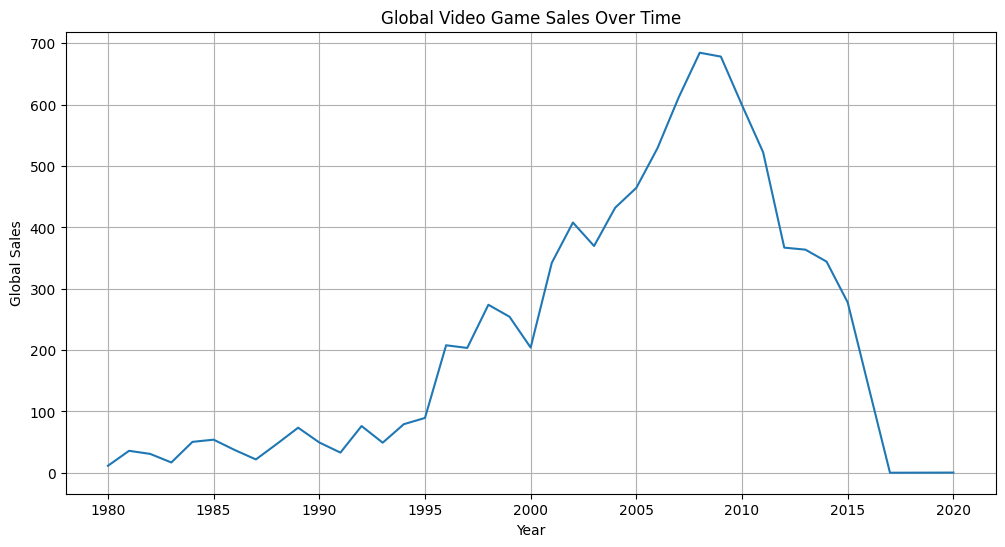

In [135]:
#video_game_filter.info()
#video_game_filter.head(3)

#aggregate global sale by year
yearly_sales = video_game_filter.groupby('Year_of_Release')['Global_Sales'].sum()
yearly_sales

#visualise

plt.figure(figsize=(12,6))
yearly_sales.plot(kind='line')
plt.title('Global Video Game Sales Over Time')
plt.xlabel('Year')
plt.ylabel('Global Sales')
plt.grid(True)
plt.show()

The line graph above shows the global video game sales trends over time, from 1980 to 2020. Here are some observations:



*   Growth Periods: There's a noticeable growth in sales starting in the mid-1990s, peaking around 2008.
*   Peak Sales: The highest global sales occured in 2008
*   Decline in sales: After 2008, there's a consistent decline in global sales.
*   Recent Years: The dataset includes limited data for years after 2016, which explains the low sales figures for 2017 and 2020.

The analysis highlight key periods in the video game industry, particularly the rapid growth phase in the early 2020s and subsequent decline after 2008. The decline could be attributed to various factors such as market saturation, the rise of mobile gaming, changes in consumer preferences, or even incomplete data for recent years.



Compare the popularity of genres or platforms across different regions.

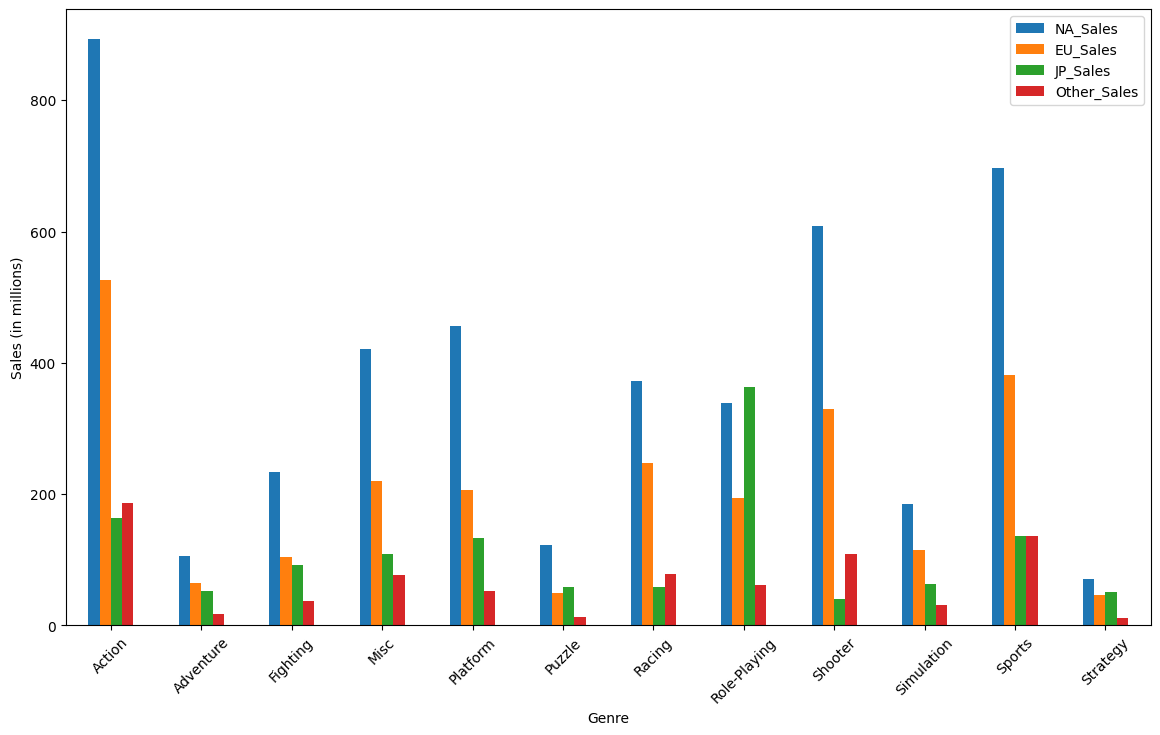

In [152]:
#df[['Genre','NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].isnull().sum()
pop_genre_df = df.dropna(subset='Genre')
pop_genre_df_sales = pop_genre_df.groupby('Genre')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()

#display
pop_genre_df_sales.plot(kind='bar',figsize=(14,8))
plt.ylabel('Sales (in millions)')
plt.xticks(rotation=45)
plt.show()



Reginal Insights:


*   North America: NA has the highest sales in most genres, indicating a large market for video game. Action, shooter and sports genres are particular popular.
*   Europe: Similar to NA, EU also shows a strong preference for Action and Shooter games, with Sport also being popular.

*   Japan: JP stands out with its high sales of Role-Playing games, which is a cultural preference. Other genres like action and platform also do well.

*   Other Regions: The sales pattern in Other regions seems to follow NA and EU trends but a lower scale.



Correlation between Critic and User Scores

In [153]:
df[['Critic_Score','User_Score']].isnull().sum()

,0
Critic_Score,8668
User_Score,6769


In [154]:
# filter out rows where either critic_score or User_score is NaN
video_game_score_df = df.dropna(subset=['Critic_Score','User_Score'])

In [158]:
# convert user_score to numeric
video_game_score_df['User_Score'] = pd.to_numeric(video_game_score_df['User_Score'],errors='coerce')

/tmp/ipython-input-3246307053.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [159]:
video_game_score_df.dropna(subset = ['User_Score'], inplace=True)

/tmp/ipython-input-128448166.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [162]:
# calculate the correlation coefficient
correlation = video_game_score_df['Critic_Score'].corr(video_game_score_df['User_Score'])
correlation

np.float64(0.5806276909318174)

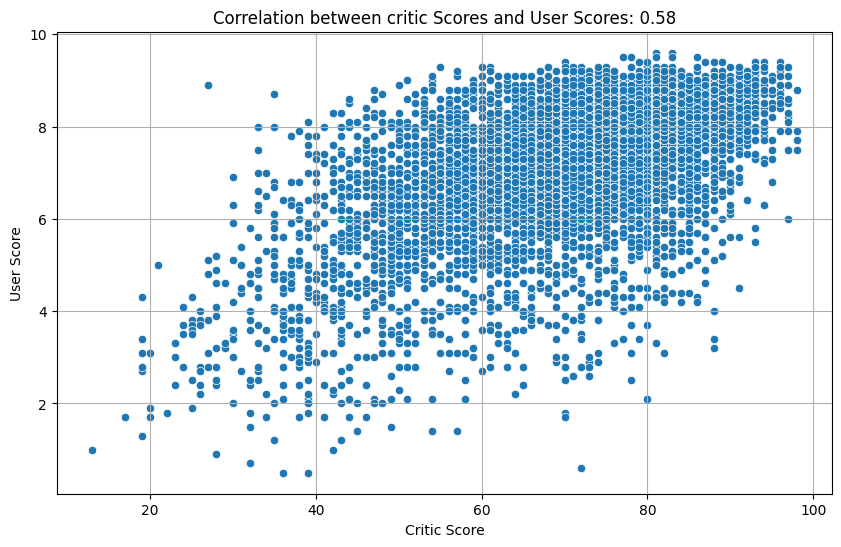

In [167]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Critic_Score',y='User_Score',data=video_game_score_df)
plt.title(f'Correlation between critic Scores and User Scores: {correlation:.2f}')
plt.xlabel('Critic Score')
plt.ylabel('User Score')
plt.grid(True)
plt.show()

# **4. Machine Learning Applications:**

4.1 Sales Prediction Models: Use machine learning to predict future sales based on various features.





In [185]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge, Lasso, ElasticNet

In [186]:
# Select features for prediction and target variable
features = df[['Platform','Genre','Publisher', 'Critic_Score', 'User_Score']].copy()
target = df['Global_Sales']

# Handle missing values by imputation or dropping
features['User_Score'] = pd.to_numeric(features['User_Score'],errors='coerce')
features_clean = features.dropna() #droping rows with missing values
target_clean = df.loc[features_clean.index,'Global_Sales']

#convert categorical variable using one-hot encoding
categorical_features = ['Platform', 'Genre', 'Publisher']
numerical_features = ['Critic_Score', 'User_Score']

#Create preprocessing pipelines for both numeric and categorical data
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)])

# Create the preprocessing and training pipeline
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', LinearRegression())])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_clean, target_clean, test_size=0.2, random_state=0)


# 2. Define parameter grid for GridSearch
param_grid = [
    # Linear Regression parameters
    {
        'regressor': [LinearRegression()],
        'regressor__fit_intercept': [True, False],
        'preprocessor__num__imputer__strategy': ['mean', 'median']
    },
    # Ridge Regression parameters
    {
        'regressor': [Ridge()],
        'regressor__alpha': [0.1, 1.0, 10.0],
        'regressor__fit_intercept': [True, False],
        'preprocessor__num__imputer__strategy': ['mean', 'median']
    },
    # Lasso Regression parameters
    {
        'regressor': [Lasso()],
        'regressor__alpha': [0.1, 1.0, 10.0],
        'regressor__fit_intercept': [True, False],
        'preprocessor__num__imputer__strategy': ['mean', 'median']
    }
]

# 3. Create GridSearchCV with your pipeline
grid_search = GridSearchCV(
    model,
    param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1
)

# 4. Fit the grid search
grid_search.fit(X_train, y_train)

#y_pred = model.predict(X_test)

# Evaluate on test data
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print("\n" + "="*50)
print("GRIDSEARCH RESULTS")
print("="*50)
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation R²: {grid_search.best_score_:.4f}")
print("\nTEST SET PERFORMANCE:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")



GRIDSEARCH RESULTS
Best parameters: {'preprocessor__num__imputer__strategy': 'mean', 'regressor': Ridge(), 'regressor__alpha': 10.0, 'regressor__fit_intercept': False}
Best cross-validation R²: 0.1530

TEST SET PERFORMANCE:
Mean Squared Error (MSE): 3.3087
Root Mean Squared Error (RMSE): 1.8190
R² Score: 0.1976


R² ≈ 0.20 means the model explains about 20% of the variance in the target variable on the test set with average errors around 1.8M sales